## Installing and Importing Dependencies

In [ ]:
!pip install qiskit[visualization] qiskit-aer matplotlib pylatexenc --upgrade --no-cache-dir

In [2]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

##Define Uf (unitary f(x) mapping)

In [3]:
# Balanced: f(x) = x_0 ⊕ x_1 ⊕ ... ⊕ x_{n-1}
def Uf_balanced(n):
    U_f = QuantumCircuit(n + 1)
    for i in range(n):
        U_f.cx(i, n)
    return U_f

# Constant: f(x) = 0 or f(x) = 1
def Uf_constant(n, output_value=0):
    U_f = QuantumCircuit(n + 1)
    if output_value == 1:
        U_f.x(n)  # Flip output qubit
    return U_f

## Deutsch–Jozsa Circuit Construction

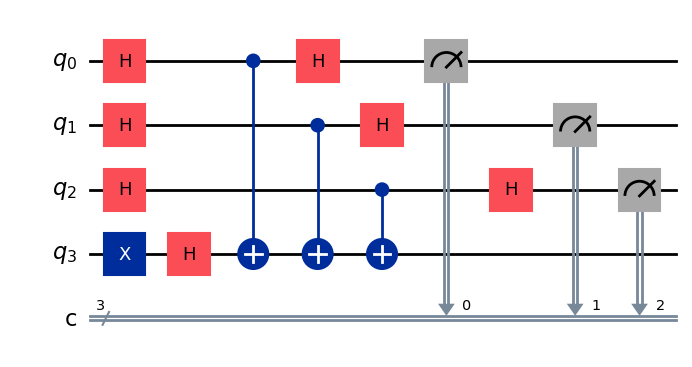

In [12]:
def deutsch_jozsa_circuit(n, U_f):
    qc = QuantumCircuit(n + 1, n)

    # Step 1: Prepare |0...0⟩|1⟩
    qc.x(n)
    qc.h(range(n + 1))

    # Step 2: Apply U_f
    qc.compose(U_f, inplace=True)

    # Step 3: Hadamard on input register
    qc.h(range(n))

    # Step 4: Measure input register
    qc.measure(range(n), range(n))
    return qc

#display circuit
display(qc.draw('mpl'))

## Run and Visualize

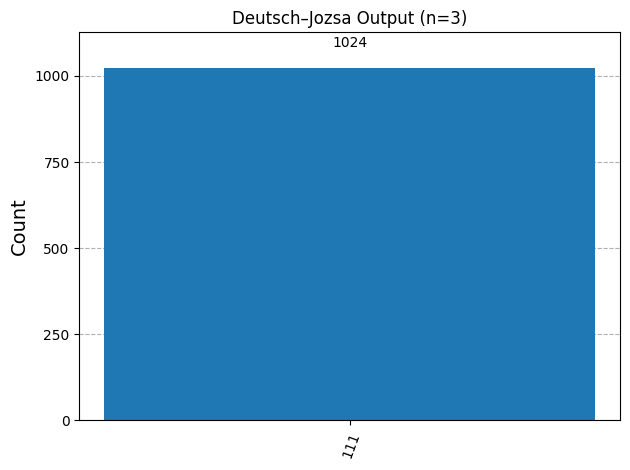

In [13]:
#Set no. of input quibtis
n = 3

# Run for balanced case //try Uf_constant(n, output_value=0)
U_f = Uf_balanced(n)
qc = deutsch_jozsa_circuit(n, U_f)

# Simulate
sim = AerSimulator()
compiled = transpile(qc, sim)
result = sim.run(compiled, shots=1024).result()
counts = result.get_counts()

# Show histogram
display(plot_histogram(counts, title="Deutsch–Jozsa Output (n=3)"))
plt.show()

#What Does the Histogram Tell Us?

The histogram shows the measurement outcomes of the input register after running the Deutsch–Jozsa algorithm 1024 times.

- If the histogram shows **only `'000'`**, the function \( f(x) \) is **constant** — it returns the same output for all \( x \).
- If the histogram shows **any other result** (e.g., `'111'`), the function \( f(x) \) is **balanced** — it returns 0 for half the inputs and 1 for the other half.

In this run, the output `'111'` appeared in **all 1024 shots**, so we can confidently conclude:

> **The function \( f(x) \) is balanced.**

This is consistent with the behavior of our oracle \( U_f \), which implemented the function:
$[
f(x) = x_0 \oplus x_1 \oplus x_2
$]
—a balanced Boolean function by definition.
